# 14.8 분류와 위치 추정

물체의 위치를 추정하는 것은 회귀 작업으로 나타낼 수 있음

바운딩박스를 예측하는 일반적인 방법은 물체 중심의 수평, 수직 좌표와 높이, 너비 예측 

네개의 유닛을 가진 밀집출력층을 추가하고 MSE 손실을 사용해 훈련

In [ ]:
base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
class_output = keras.layers.Dense(n_classes, activation="softmax")(avg)
loc_output = keras.layers.Dense(4)(avg)
model = keras.models.Model(inputs=base_model.input,
                           outputs=[class_output, loc_output])
model.compile(loss=["sparse_categorical_crossentropy", "mse"],
              loss_weights=[0.8, 0.2], # 어떤 것을 중요하게 생각하느냐에 따라 지정
              optimizer=optimizer, metrics=["accuracy"])

바운딩 박스를 추정하기 위해서는, 데이터가 바운딩 박스 레이블을 가지고 있어야함

꽃 데이터셋은 꽃 주위에 바운딩 박스를 가지고 있지 않음

- 레이블을 만드는 것은 많은 비용이 드는 작업

- 이미지에 바운딩 박스를 추가하기 위해 오픈소스 이미지 레이블 도구나

- 이미지가 매우 많다면 크라우드소싱 플랫폼을 고려해볼 수 있음

- 세팅, 양식준비, 감독등 크라우드소싱은 많은 노력이 필요하므로 정말 필요한지 잘 확인해야함 










꽃 데이터셋의 모든 이미지에 대해 바운딩 박스가 준비되어있다고 가정

- 클래스 레이블, 바운딩 박스와 함께 전처리된 이미지의 배치가 하나의 원소인 데이터셋을 만들어야함

- 각 원소는 (images, (class_labels, bounding_boxes)) 형태의 튜플이 됨

 

모델 훈련시 손실함수로 MSE 외에, 좋은 지표로 IoU사용

- 바운딩 박스를 얼마나 잘 예측하는지 평가하는 데 널리 사용됨

- IoU값은 예측한 바운딩 박스와 타깃 바운딩 박스 사이에 중첩되는 영역을 전체 영역으로 나눈 것

- tf.keras.metrics.MeanIoU에 구현

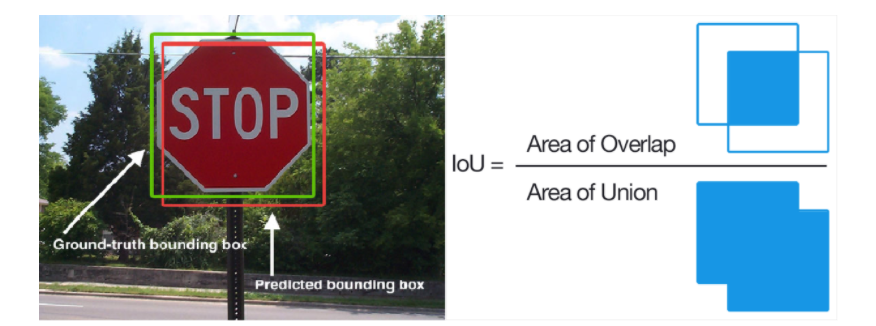